In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [49]:
data = '/content/car_evaluation.csv'

df = pd.read_csv(data, header=None)
df.shape

(1728, 7)

In [50]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [51]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [53]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [54]:
df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [55]:
X = df.drop(['class'], axis=1)

y = df['class']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [57]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [58]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [20]:
!pip install category_encoders



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 926.3 kB/s eta 0:00:00


In [59]:
import category_encoders as ce


In [60]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [61]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [62]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [63]:
from sklearn.ensemble import RandomForestClassifier
#classifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


In [64]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [65]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

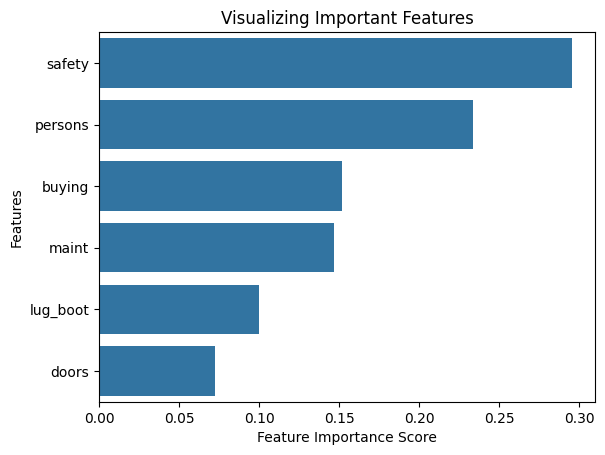

In [66]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [101]:
import numpy as np

X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

# Drop the 2nd and 5th columns from X
X = np.delete(X, [1, 4], axis=1)
print(X)

[['vhigh' '2' 'small']
 ['vhigh' '2' 'small']
 ['vhigh' '2' 'small']
 ...
 ['low' 'more' 'big']
 ['low' 'more' 'big']
 ['low' 'more' 'big']]


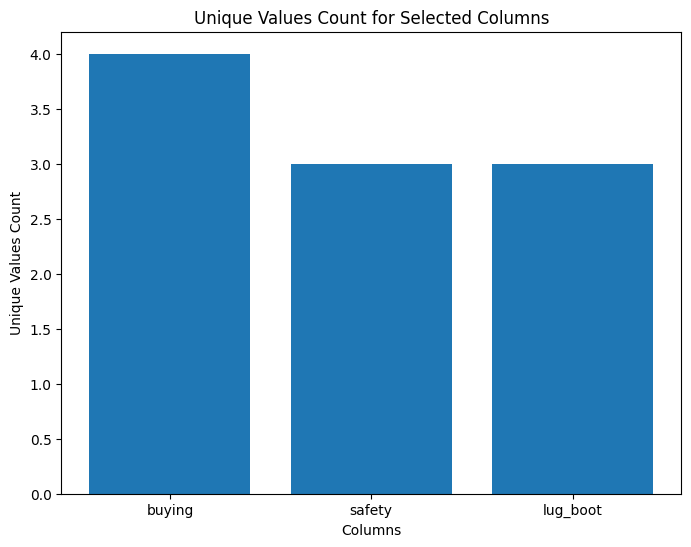

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# If you haven't loaded the data yet, make sure to do that first

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Drop the 2nd and 5th columns from X
X = np.delete(X, [1, 4], axis=1)

# Create a bar plot
plt.figure(figsize=(8, 6))

# Count unique values in each column
unique_counts = [len(np.unique(col)) for col in X.T]

# Plot the counts
plt.bar(np.arange(len(unique_counts)), unique_counts, tick_label=['buying', 'safety', 'lug_boot'])

# Adding labels
plt.xlabel('Columns')
plt.ylabel('Unique Values Count')
plt.title('Unique Values Count for Selected Columns')

# Show the plot
plt.show()


In [96]:
import pandas as pd
import numpy as np
doors = df['buying'].values
safety = df['safety'].values
mse = np.mean((actual - predicted)**2)

print("Mean Square Error:", mse)
matrix = df.values

print("Matrix:")
print(matrix)

Mean Square Error: 0.038
Matrix:
[['vhigh' 'vhigh' '2' ... 'small' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'high' 'unacc']
 ...
 ['low' 'low' '5more' ... 'big' 'low' 'unacc']
 ['low' 'low' '5more' ... 'big' 'med' 'good']
 ['low' 'low' '5more' ... 'big' 'high' 'vgood']]


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[114   9   4   2]
 [  2  17   0   1]
 [  8   0 389   0]
 [  3   2   0  20]]


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.90      0.88      0.89       129
        good       0.61      0.85      0.71        20
       unacc       0.99      0.98      0.98       397
       vgood       0.87      0.80      0.83        25

    accuracy                           0.95       571
   macro avg       0.84      0.88      0.85       571
weighted avg       0.95      0.95      0.95       571

